In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import bisect
import matplotlib.pyplot as plt

In [2]:
# Parâmetros do Van der Pol
mu = 3
A = 15
omega = 4.065

def F(s, t):
    x, y = s
    dxdt = y
    dydt = -x + mu * (1 - x**2) * y + A * np.sin(omega * t)
    return [dxdt, dydt]

def DF(s):
    x, y = s
    return np.array([
        [0, 1],
        [-1 - 2 * mu * x * y, mu * (1 - x**2)]
    ])

In [3]:
# Jacobiana do acoplamento
def DH(s):
    return np.array([
        [0, 1],
        [0, 0]
    ])

In [4]:
def MSF(r, t_span=(0, 10**3), dt=0.001):
    t = np.arange(t_span[0], t_span[1], dt)
    s0 = [1.0, 1.0]  # Condição inicial para o sistema de Duffing (x, y)
    s_t = odeint(F, s0, t)  # Solução do sistema não acoplado

    xi = np.random.rand(2)  # Vetor de perturbação inicial
    xi /= np.linalg.norm(xi)  # Normalização
    LE = 0.0  # Inicializa o expoente de Lyapunov

    for i in range(1, len(t)):
        J = DF(s_t[i]) - r * DH(s_t[i])  # Jacobiano variacional
        xi = np.dot(np.eye(2) + dt * J, xi)  # Evolução linear de xi
        xi_norm = np.linalg.norm(xi)
        LE += np.log(xi_norm)
        xi /= xi_norm  # Renormaliza

    return LE / (len(t) * dt)  # Retorna o expoente médio

In [5]:
# Intervalo de r = sigma * lambda_k
r_values = np.linspace(0, 10, 3*(10**2))
LE_values = [MSF(r) for r in r_values]

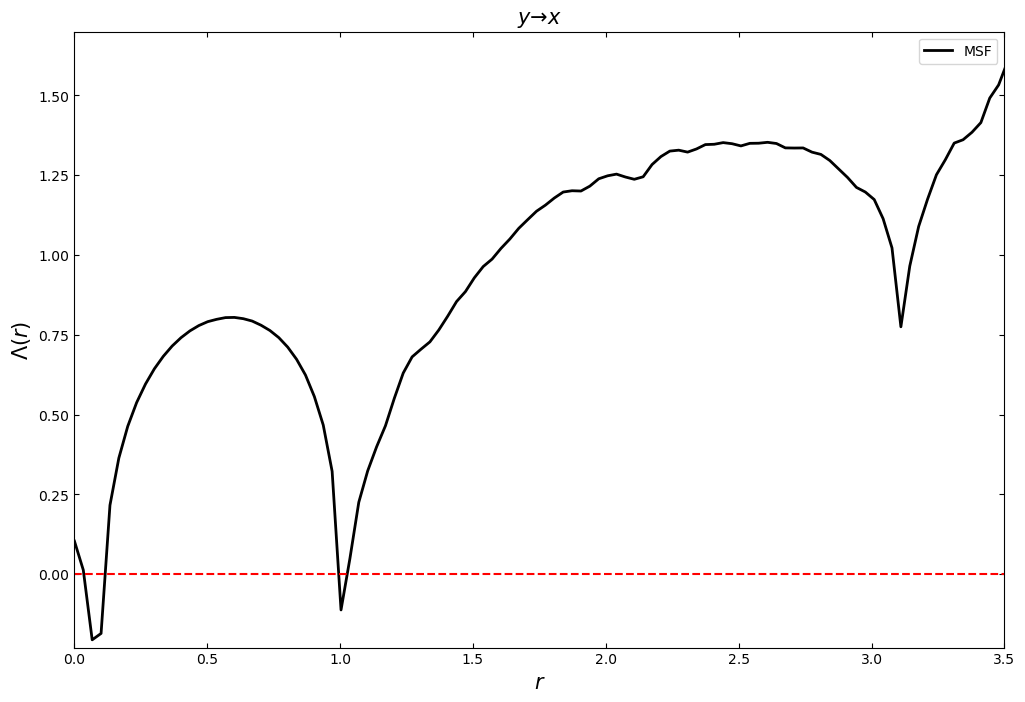

In [31]:
# Plotar MSF
plt.figure(figsize=(12, 8))
plt.plot(r_values, LE_values, 'k', linewidth=2, label='MSF')
plt.axhline(0, color='r', linestyle='--')
plt.xlim(0, 3.5)
plt.ylim(-0.23, 1.7)
plt.xlabel(r'$r$', fontsize=15)
plt.ylabel(r'$\Lambda(r)$', fontsize=15)
plt.title(r'$y \to x$', fontsize=15)
plt.legend()
plt.grid(False)
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.show()

In [33]:
# Encontra os pontos onde MSF(r) = 0 usando bisect
r_1 = bisect(lambda r: MSF(r), 0, 0.1, rtol=1e-6)
r_2 = bisect(lambda r: MSF(r), 0.1, 0.2, rtol=1e-6)



print(f"r_1 = {r_1:.3f}")
print(f"r_2 = {r_2:.3f}")

r_1 = 0.035
r_2 = 0.109


In [38]:
r_3 = bisect(lambda r: MSF(r), 0.97, 1.01, rtol=1e-6)


print(f"r_3 = {r_3:.3f}")


r_3 = 1.000


In [41]:
r_4 = bisect(lambda r: MSF(r), 1.01, 1.1, rtol=1e-6)
print(f"r_4 = {r_4:.3f}")

r_4 = 1.027


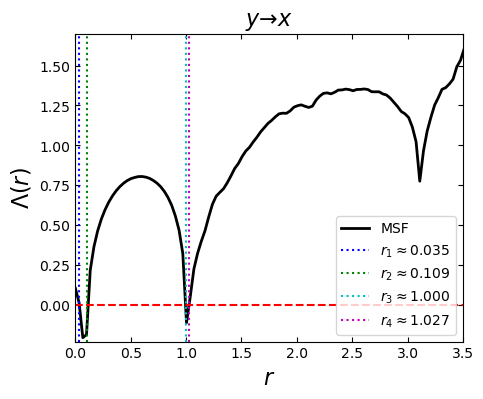

In [42]:
# Gera o novo gráfico da MSF com os pontos onde MSF = 0
fig21=plt.figure(figsize=(5, 4))
plt.plot(r_values, LE_values, 'k', linewidth=2, label='MSF')
plt.axhline(0, color='r', linestyle='--')
plt.axvline(r_1, color='b', linestyle=':', label=fr'$r_1 \approx {r_1:.3f}$')
plt.axvline(r_2, color='g', linestyle=':', label=fr'$r_2 \approx {r_2:.3f}$')
plt.axvline(r_3, color='c', linestyle=':', label=fr'$r_3 \approx {r_3:.3f}$')
plt.axvline(r_4, color='m', linestyle=':', label=fr'$r_4 \approx {r_4:.3f}$')
plt.xlim(0, 3.5)
plt.ylim(-0.23, 1.7)
plt.xlabel(r'$r$', fontsize=16)
plt.ylabel(r'$\Lambda(r)$', fontsize=16)
plt.title(r'$y \to x$', fontsize=16)
plt.legend()
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.grid(False)
fig21.savefig('yx.pdf', format='pdf', dpi=300)
plt.show()